<a href="https://colab.research.google.com/github/CristianMts/Escola-DNC/blob/main/Desafio04_CristianReisMartins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Construindo um modelo de Regressão para marketing**
 - Aluno: [Cristian dos Reis Martins](https://www.linkedin.com/in/cristian-r-martins/)

## 1. Entendendo o problema

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos. Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

## 2. Análise descritiva



In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Link do Dataset utilizado para a realização do projeto concedido pela Escola DNC. [Aqui](https://drive.google.com/file/d/1Hn4Jf2d3R0QWP2830Lgu7dYixoy8sQ6n/view).

In [ ]:
dataset = files.upload()

Saving MKT.csv to MKT (1).csv


In [ ]:
dados = pd.read_csv('MKT.csv')
print(dados.head())
print(dados.tail())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
     youtube  facebook  newspaper  sales
166    45.84      4.44      16.56   9.12
167   113.04      5.88       9.72  11.64
168   212.40     11.16       7.68  15.36
169   340.32     50.40      79.44  30.60
170   278.52     10.32      10.44  16.08


In [ ]:
dados.info()
print('\n----------------------------------------\n')
dados.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB

----------------------------------------



youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
round(dados.describe(), 2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


        Tipo     Total
0    youtube  30441.60
1   facebook   4731.84
2  newspaper   6026.04
3      sales   2893.80
------------------------



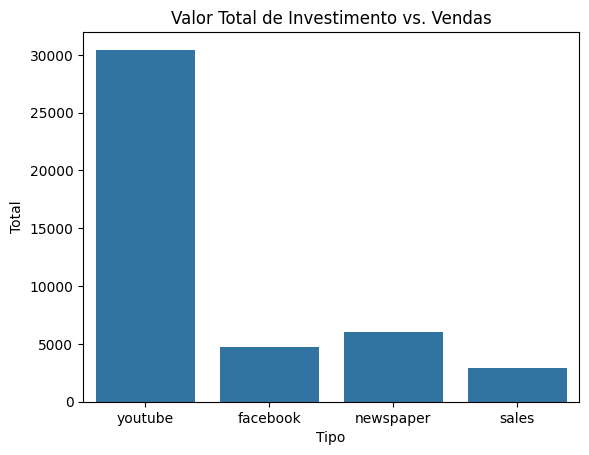

In [ ]:
dados_total = pd.DataFrame({'Tipo': dados.columns, 'Total': dados.sum()})
dados_total.reset_index(inplace=True)
dados_total = dados_total[['Tipo', 'Total']]
print(dados_total)
print('------------------------\n')
sns.barplot(data=dados_total, x='Tipo', y='Total');
plt.title("Valor Total de Investimento vs. Vendas");

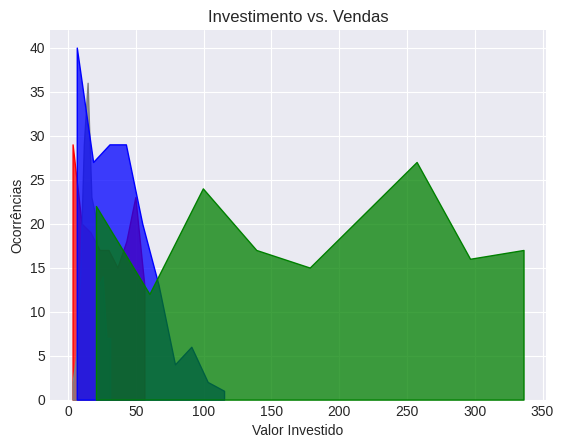

In [ ]:
sns.histplot(data=dados, x="youtube", color="red", element="poly")
sns.histplot(data=dados, x="newspaper", color="gray", element="poly")
sns.histplot(data=dados, x="facebook", color="blue", element="poly")
sns.histplot(data=dados, x="sales", color="green", element="poly")
plt.ylabel("Ocorrências")
plt.xlabel("Valor Investido")
plt.title("Investimento vs. Vendas");
plt.show()

Foi observado que o total dos investimentos é muito maior que o valor das vendas (retorno), o que nos leva a duas possibilidades: ou a empresa está com um prejuízo aproximado de 1400%, ou os títulos das colunas estão desordenados. Portanto, definiremos a primeira coluna como Vendas, seguida pelas colunas de investimentos em YOUTUBE, FACEBOOK e NEWSPAPER.

In [ ]:
dados = dados.rename(columns={'youtube': 'sales', 'facebook': 'youtube', 'newspaper': 'facebook', 'sales': 'newspaper'})
dados.head()

,sales,youtube,facebook,newspaper
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Construindo duas novas colunas no dataframe principal:
# 'investment' -> Investimento Total: ('youtube' + 'facebook' + 'newspaper')
# 'return' -> Retorno do investimento: ('sales' - 'investment')/('investment')

new_data = dados
new_data['investment'] = new_data['youtube'] + new_data['facebook'] + new_data['newspaper']
new_data['return'] = round((new_data['sales'] - new_data['investment']) / new_data['investment'], 2)
new_data.head()

,sales,youtube,facebook,newspaper,investment,return
0,84.72,19.20,48.96,12.60,80.76,0.05
1,351.48,33.96,51.84,25.68,111.48,2.15
2,135.48,20.88,46.32,14.28,81.48,0.66
3,116.64,1.80,36.00,11.52,49.32,1.36
4,318.72,24.00,0.36,20.88,45.24,6.05


In [ ]:
data_total = pd.DataFrame({'Tipo': new_data.columns, 'Total': new_data.sum()})
data_total.drop(['return'], axis=0, inplace=True)
data_total.reset_index(inplace=True)
data_total = data_total[['Tipo', 'Total']]
data_total

,Tipo,Total
0,sales,30441.60
1,youtube,4731.84
2,facebook,6026.04
3,newspaper,2893.80
4,investment,13651.68


## 3. Análise exploratória

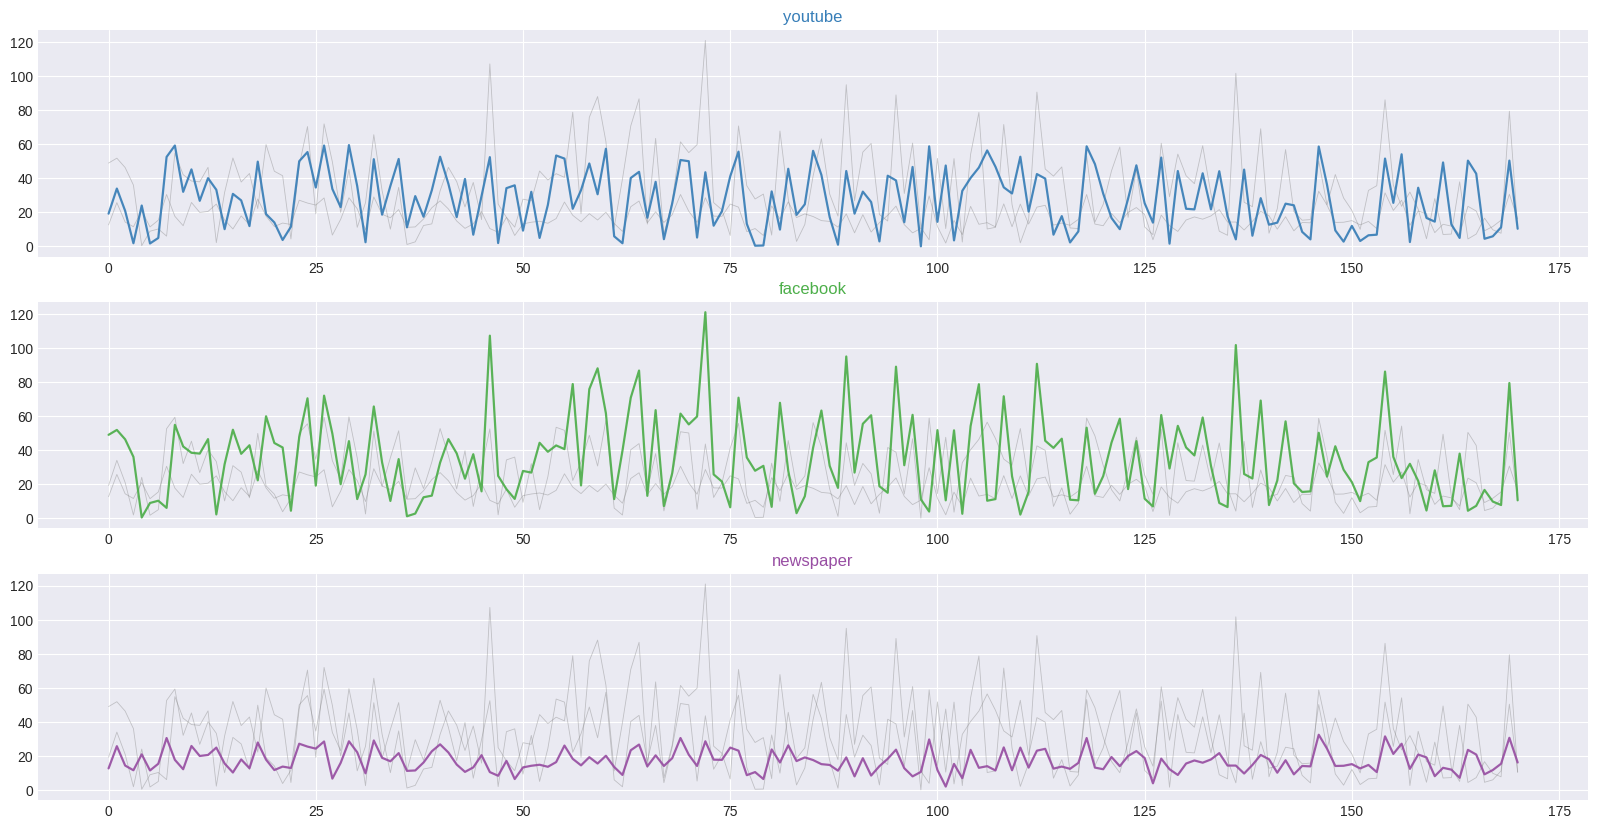

In [ ]:
multi = new_data[['youtube', 'facebook', 'newspaper']]
plt.figure(figsize=(20,10))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
num = 0
for col in multi:
  num += 1
  plt.subplot(3, 1, num)
  for v in multi:
    plt.plot(multi.index, multi[v], marker='', color='grey', linewidth=0.6, alpha=0.4)
  plt.plot(multi.index, multi[col], marker='', color=palette(num), linewidth=1.6, alpha=0.9, label=col)
  plt.title(col, loc='center', fontsize=12, fontweight=0, color=palette(num))
plt.show();

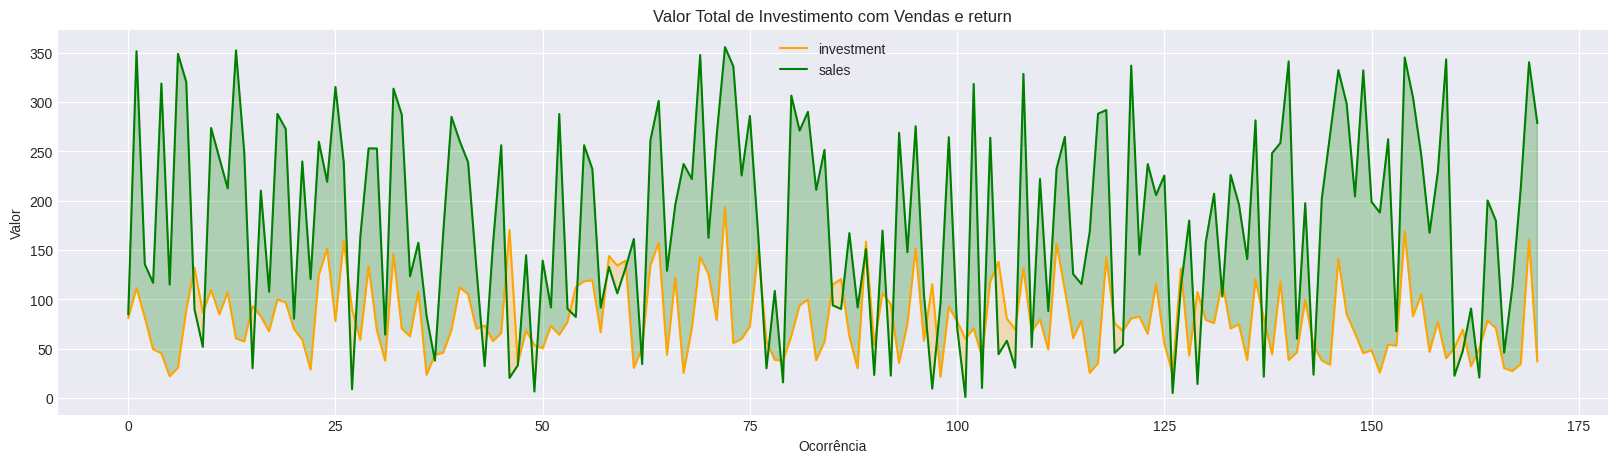

In [ ]:
fig, ay = plt.subplots(figsize=(20, 5))
sns.lineplot(data=new_data, x=new_data.index, y='investment', color='orange', label='investment')
sns.lineplot(data=new_data, x=new_data.index, y='sales', color='green', label='sales')
ay.fill_between(
    new_data.index, new_data['investment'], new_data['sales'],
    where=(new_data['investment'] > new_data['sales']),
    interpolate=True, color='orange', alpha=0.25
    )
ay.fill_between(
    new_data.index, new_data['investment'], new_data['sales'],
    where=(new_data['investment'] < new_data['sales']),
    interpolate=True, color='green', alpha=0.25
    )
ay.legend()
plt.xlabel('Ocorrência')
plt.ylabel('Valor')
plt.title("Valor Total de Investimento com Vendas e return");

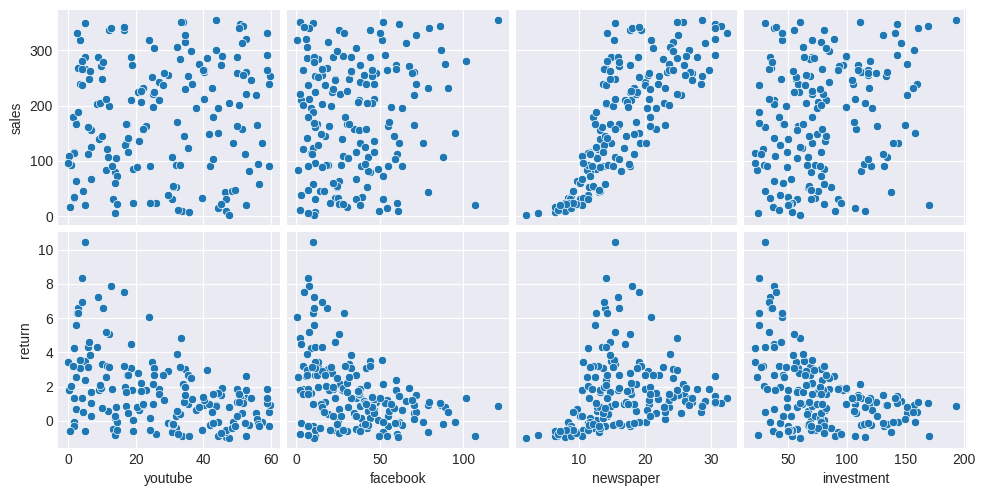

In [ ]:
sns.pairplot(new_data, x_vars=['youtube', 'facebook', 'newspaper', 'investment'], y_vars=['sales', 'return']);

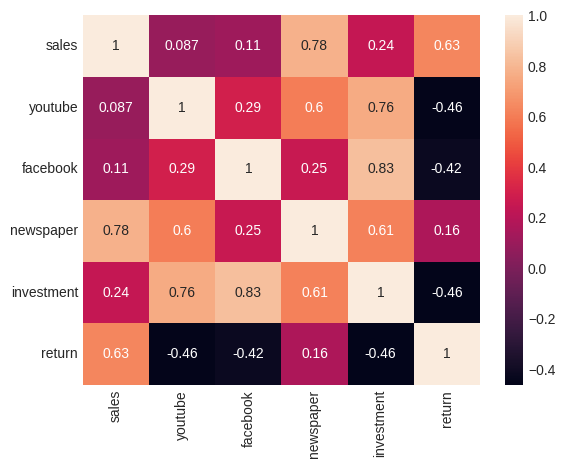

In [ ]:
sns.heatmap(new_data.corr(), annot = True);

## 4. Modelagem

In [ ]:
X = new_data[['youtube', 'facebook', 'newspaper']]
y = new_data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.78, random_state=22)
M_reg = LinearRegression()
M_reg.fit(X_train, y_train)

M_test = M_reg.predict(X_test)

In [ ]:
R2 = r2_score(y_test, M_test)
print(f'A acurácia deste modelo é de {round(R2*100)}%.')

A acurácia deste modelo é de 91%.


Após ajustes, a melhor acurácia alcançada foi de 91%, utilizando 80% dos dados para treinamento.